# Objectives
- Understand when to use each type of graph (line charts, bar charts and heatmaps)
- Use Seaborn to plot line charts, bar charts and heatmaps

***
# Line Charts, Bar Charts and Heatmaps
- Line Chart: to show a trend over time
- Bar Chart: to express length (or height), especially iun comparison to other items
- Heatmap: to rapidly identify high or low points, trends, or interactions based on color 

## Import Relevant Libraries and Read Data

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [86]:
url = "https://bit.ly/3cngqgL"
df = pd.read_csv(url, 
                 parse_dates=['date_utc'], 
                 dtype={'hour_utc':int,'minute_utc':int,'id':str}
                )

In [87]:
df.head()

,id,username,date_utc,hour_utc,minute_utc,retweets
0,815422340540547073,realDonaldTrump,2017-01-01 05:00:10+00:00,5,0,27134
1,815930688889352192,realDonaldTrump,2017-01-02 14:40:10+00:00,14,40,23930
2,815973752785793024,realDonaldTrump,2017-01-02 17:31:17+00:00,17,31,14119
3,815989154555297792,realDonaldTrump,2017-01-02 18:32:29+00:00,18,32,3193
4,815990335318982656,realDonaldTrump,2017-01-02 18:37:10+00:00,18,37,7337


## Line Plot
Let's examine the number of retweets for each candidate over time. On the x-axis will be `date_utc`, the y-axis will contain `retweets` and the `hue` will be `username`.

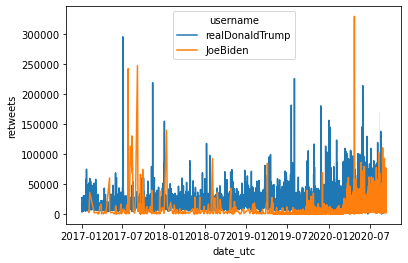

In [85]:
sns.lineplot(x='date_utc', y='retweets',data=df, hue='username')
plt.show()

## Bar Plot
I want to find the total number of tweets for both usernames. First I am going to group all of the tweets together by username (we will learn how to do this later) using the `groupby` method. Then I will reset the index to bring the `username` back from the index and into a column.

In [90]:
retweets = df.groupby('username').agg(sum).retweets
retweets = retweets.reset_index()

Now, I want you to create the bar plot using `username` on the x-axis and `retweets` on the y-axis.

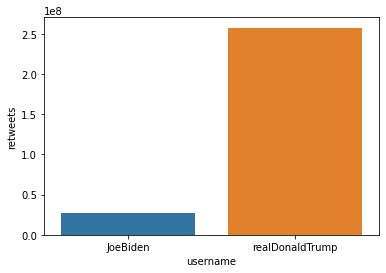

In [92]:
sns.barplot(x = 'username', y='retweets', data=retweets)
plt.show()

## Heatmap Data Manipulation
I am going to prepare the data for our heat maps. Right now we have a bunch of tweets that happened all throughout the day and I want to group those tweets together by the hour and minute they were sent, along with who they were sent from. 

In [56]:
g = df.groupby(['hour_utc','minute_utc','username'])

Then, I will find the number of unique tweets for each username during each hour-minute combination.

In [58]:
tweet_cnt = g.id.nunique()
tweet_cnt.head()

hour_utc  minute_utc  username       
0         0           JoeBiden           26
                      realDonaldTrump     6
          1           JoeBiden           16
                      realDonaldTrump    11
          2           JoeBiden            6
Name: id, dtype: int64

Now, I am going to reshape our data (you will learn how to do this on lesson 26!!) to have the columns contain the minutes and the rows contain the hours. 

In [93]:
jb_tweet_cnt = tweet_cnt.loc[:,:,'JoeBiden'].reset_index().pivot(index='hour_utc', columns='minute_utc', values='id')

In [94]:
jb_tweet_cnt.iloc[:10,:9]

minute_utc,0,1,2,3,4,5,6,7,8
hour_utc,,,,,,,,,
0,26.0,16.0,6.0,7.0,4.0,24.0,2.0,2.0,9.0
1,24.0,7.0,5.0,6.0,4.0,19.0,1.0,2.0,6.0
2,3.0,3.0,3.0,NaN,5.0,1.0,4.0,8.0,NaN
3,3.0,3.0,3.0,4.0,5.0,1.0,3.0,5.0,4.0
4,1.0,1.0,1.0,2.0,NaN,NaN,1.0,1.0,1.0
5,1.0,2.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,7.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
11,2.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


It looks like we have some null values so I am going to replace those null values with 0. I am also going to make sure that all minutes and hours are included.

In [95]:
jb_tweet_cnt.fillna(0, inplace=True)
# Ensure all hours in table
jb_tweet_cnt = jb_tweet_cnt.reindex(range(0,24), axis=0, fill_value=0)
# Ensure all minutes in table
jb_tweet_cnt = jb_tweet_cnt.reindex(range(0,60), axis=1, fill_value=0).astype(int) 

Let's repeat all of that for Donald Trump.

In [96]:
dt_tweet_cnt = tweet_cnt.loc[:,:,'realDonaldTrump'].reset_index().pivot(index='hour_utc', columns='minute_utc', values='id')
dt_tweet_cnt.fillna(0, inplace=True)
dt_tweet_cnt = dt_tweet_cnt.reindex(range(0,24), axis=0, fill_value=0)
dt_tweet_cnt = dt_tweet_cnt.reindex(range(0,60), axis=1, fill_value=0).astype(int)

## Heatmaps
It's your turn to plot the heatmaps and interpret the results!!

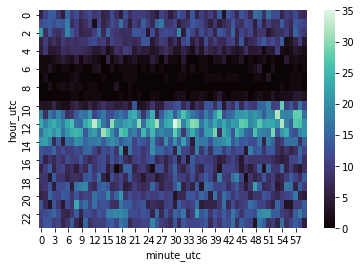

In [65]:
sns.heatmap(dt_tweet_cnt, cmap='mako')
plt.show()

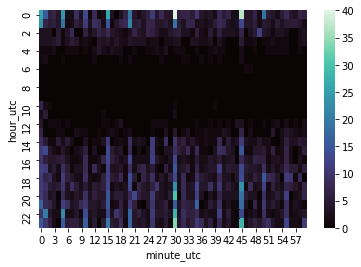

In [66]:
sns.heatmap(jb_tweet_cnt, cmap='mako')
plt.show()